## Datathon

**Problem Statement:** “Customers chat with us for various reasons about their account – whether it’s to ask about when their payment is due, to request a late fee waiver, or to close their account. They first engage with the chatbot Sydney and then with a live agent if Sydney can’t help. Based on just the chat transcripts, how can you determine if a customer was dissatisfied with their experience? And is there a reason that causes more dissatisfaction with Sydney than an agent? Or vice versa?”

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [116]:
# import libraries
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [5]:
df = pd.read_excel('Day2.xlsx')
# df2 = pd.read_excel('day4.xlsx')
# df3 = pd.read_excel('day5.xlsx')
# df4 = pd.read_excel('day6.xlsx')

In [6]:
df.shape

(689585, 9)

In [7]:
df.head()

,DATE_TIME,END_DATE_TIME,IVA_CHAT_ID,CHAT_TYPE,CLIENT_ID,LOGIN_STATE,IVA_CHAT_REASON,INPUT,RESPONSE
0,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,0000_Charge Not Listed,I just made a purchase of a kayak on my card b...,I've taken you to the page where you can view ...
1,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,OnUserLogIn,OnUserLogIn,Thank you for logging in.<br/><br/>
2,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,WelcomeUser,WelcomeUser,"Hi, I?m Sydney, your Virtual Assistant! Just s..."
3,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,HostPageData,HostPageData,NaN
4,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,025_Need Card Information,How do I find account number,For your security I can't give out your accoun...


In [8]:
# Combine INPUT and RESPONSE columns into 1 string
df = df.dropna(axis = 0)
conversation = []
for row in range(0, df.shape[0]):
    conversation.append(' '.join(str(x) for x in df.iloc[row, 7:9]))
df['conversation'] = conversation

In [11]:
def sentiment_score_textblob(text_list, df):
    '''
    This function analyzes the sentiment of a conversation and returns a score.
    text_list: refers to a list with string items 
    df: refers to a dataframe 
    ''' 
    score = []
    for i in text_list:
        sentiment = TextBlob(i)
        if sentiment.sentiment[0] > 0:
            score.append('positive')
        elif sentiment.sentiment[0] < 0:
            score.append('negative')
        else:
            score.append('neutral') 
    df['sentiment_score_textblob'] = score

In [12]:
# calling function
sentiment_score_textblob(df['conversation'], df)

In [13]:
df.head()

,DATE_TIME,END_DATE_TIME,IVA_CHAT_ID,CHAT_TYPE,CLIENT_ID,LOGIN_STATE,IVA_CHAT_REASON,INPUT,RESPONSE,conversation,sentiment_score_textblob
0,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,0000_Charge Not Listed,I just made a purchase of a kayak on my card b...,I've taken you to the page where you can view ...,I just made a purchase of a kayak on my card b...,negative
1,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,OnUserLogIn,OnUserLogIn,Thank you for logging in.<br/><br/>,OnUserLogIn Thank you for logging in.<br/><br/>,neutral
2,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,WelcomeUser,WelcomeUser,"Hi, I?m Sydney, your Virtual Assistant! Just s...","WelcomeUser Hi, I?m Sydney, your Virtual Assis...",neutral
4,2021-10-02 00:00:02.185,2021-10-02 00:00:15.823,74003553,Deflected,Consumer Center,prelogin,025_Need Card Information,How do I find account number,For your security I can't give out your accoun...,How do I find account number For your security...,positive
6,2021-10-02 00:00:08.385,2021-10-02 00:01:40.300,74003559,Deflected,Lowes,postlogin,WelcomeUser,WelcomeUser,"Hi there, I?m Sydney! I can help you with ques...","WelcomeUser Hi there, I?m Sydney! I can help y...",neutral


In [14]:
# crosstabulating scores by chat type 
chattype = pd.crosstab(df.CHAT_TYPE, df.sentiment_score_textblob)
# obtaining % of sentiment breakdown by chat type
chattype_pct = chattype.div(chattype.sum(1), axis = 0)
chattype_pct

sentiment_score_textblob,negative,neutral,positive
CHAT_TYPE,,,
Deflected,0.216892,0.515534,0.267573
Error,0.191083,0.407643,0.401274
LiveChat,0.129468,0.391218,0.479314


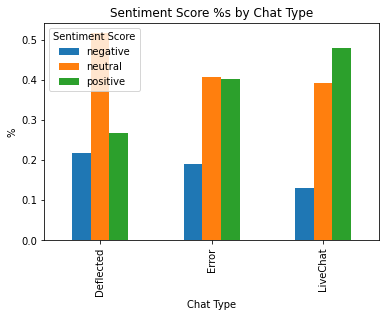

In [15]:
# bar graph of sentiment score % by chat type 
chattype_pct.plot.bar()
plt.xlabel('Chat Type')
plt.ylabel('%')
plt.title('Sentiment Score %s by Chat Type')
plt.legend(title = 'Sentiment Score')
plt.show()

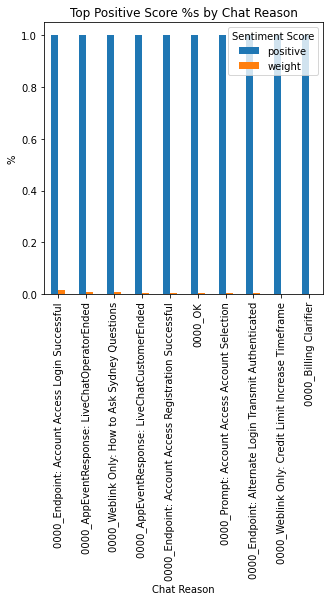

In [115]:
# crosstabulating positive sentiment by chat reason 
positivechatreasons = pd.crosstab(df.IVA_CHAT_REASON, df.sentiment_score_textblob)
positivechatreasons_pct = positivechatreasons.div(positivechatreasons.sum(1), axis = 0)
# weighting chat reasons by prevalence to show the most positive reasons that were also most prevalent in the data
positivechatreasons_pct["weight"] = positivechatreasons.sum(axis = 1) / sum(positivechatreasons.sum())
top_pos = positivechatreasons_pct.sort_values(by = ['positive', 'weight'], ascending = False).head(10)
top_pos[['positive', 'weight']].plot.bar()
plt.xlabel('Chat Reason')
plt.ylabel('%')
plt.title('Top Positive Score %s by Chat Reason')
plt.legend(title = 'Sentiment Score')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

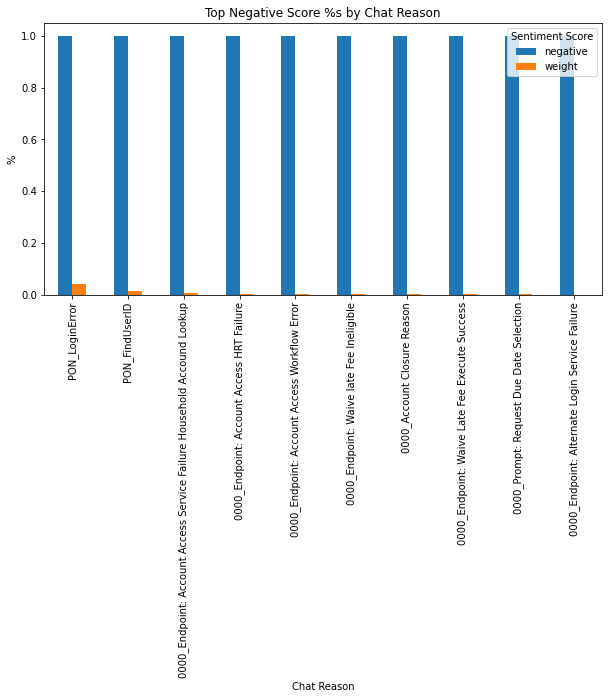

In [114]:
# crosstabulating negative sentiment by chat reason 
negativechatreasons = pd.crosstab(df.IVA_CHAT_REASON, df.sentiment_score_textblob)
negativechatreasons_pct = negativechatreasons.div(negativechatreasons.sum(1), axis = 0)
# weighting chat reasons by prevalence to show the most negative reasons that were also most prevalent in the data
negativechatreasons_pct['weight'] = negativechatreasons.sum(axis = 1) / sum(negativechatreasons.sum())
top_neg = negativechatreasons_pct.sort_values(by = ['negative', 'weight'], ascending = False).head(10)
top_neg[['negative', 'weight']].plot.bar()
plt.xlabel('Chat Reason')
plt.ylabel('%')
plt.title('Top Negative Score %s by Chat Reason')
plt.legend(title = 'Sentiment Score')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

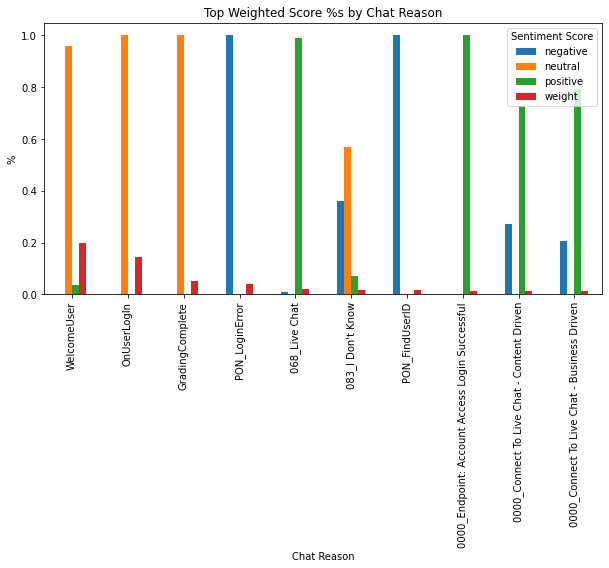

In [118]:
# crosstabulating most sentiment by most popular chat reason 
weightedchatreasons = pd.crosstab(df.IVA_CHAT_REASON, df.sentiment_score_textblob)
weightedchatreasons_pct = weightedchatreasons.div(weightedchatreasons.sum(1), axis = 0)
# weighting chat reasons by prevalence to show the most prevalent reasons
weightedchatreasons_pct['weight'] = weightedchatreasons.sum(axis = 1) / sum(weightedchatreasons.sum())
top_weight = weightedchatreasons_pct.sort_values(by = 'weight', ascending = False).head(10)
top_weight[['negative', 'neutral', 'positive', 'weight']].plot.bar()
plt.xlabel('Chat Reason')
plt.ylabel('%')
plt.title('Top Weighted Score %s by Chat Reason')
plt.legend(title = 'Sentiment Score')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [19]:
# crosstabulating sentiment by client type 
clienttype = pd.crosstab(df.CLIENT_ID, df.sentiment_score_textblob)

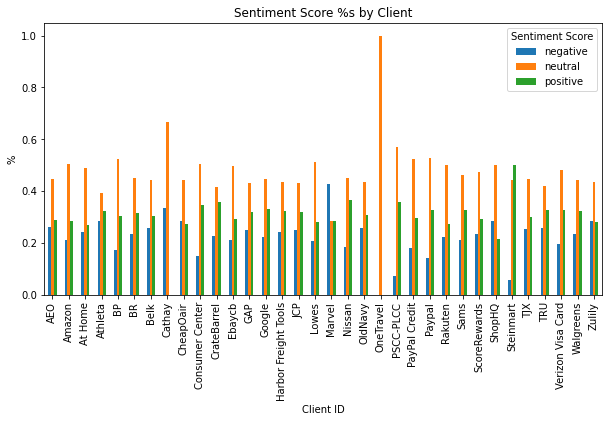

In [120]:
clienttype_pct = clienttype.div(clienttype.sum(1), axis = 0)
clienttype_pct.plot.bar()
plt.xlabel('Client ID')
plt.ylabel('%')
plt.title('Sentiment Score %s by Client')
plt.legend(title = 'Sentiment Score')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [23]:
# sampling data to check accuracy 
sample = df.sample(20)
sample

,DATE_TIME,END_DATE_TIME,IVA_CHAT_ID,CHAT_TYPE,CLIENT_ID,LOGIN_STATE,IVA_CHAT_REASON,INPUT,RESPONSE,conversation,sentiment_score_textblob
29166,2021-10-02 01:02:48.956,2021-10-02 01:04:33.171,74006943,Deflected,PayPal Credit,postlogin,0000_Account Status,Account Status Questions,The available credit on your account is $1328....,Account Status Questions The available credit ...,positive
472196,2021-10-02 23:13:56.183,2021-10-02 23:34:49.563,74061002,LiveChat,Ebaycb,postlogin,0000_AppEventResponse: LiveChatOperatorEnded,LiveChatSessionEnded,The operator has closed the live chat session,LiveChatSessionEnded The operator has closed t...,positive
473650,2021-10-02 23:18:27.447,2021-10-02 23:19:35.721,74061237,Deflected,Consumer Center,postlogin,PON_LoginError,PointOfNeed,"I noticed you're having trouble logging in, I ...",PointOfNeed I noticed you're having trouble lo...,negative
17968,2021-10-02 00:35:32.108,2021-10-02 00:37:59.486,74005481,Deflected,Amazon,postlogin,0000_Problems Paying with PayPal,PayPal credit is not working for my purchase,"I?m sorry, I seem to have encountered an error...",PayPal credit is not working for my purchase I...,negative
665492,2021-10-02 21:41:57.454,2021-10-02 21:44:06.992,94012864,Deflected,Sams,prelogin,0000_Prompt: Account Access Account Selection,TransmitResult,I found more than one account associated with ...,TransmitResult I found more than one account a...,positive
10617,2021-10-02 00:20:38.483,2021-10-02 00:21:24.377,74004714,Deflected,PayPal Credit,postlogin,0000_Prompt: Make a Payment Amount,Make a Payment,How much would you like your payment to be?<br...,Make a Payment How much would you like your pa...,positive
138998,2021-10-02 12:31:08.033,2021-10-02 12:32:45.701,74022201,Deflected,Lowes,prelogin,WelcomeUser,WelcomeUser,"Hi, I?m Sydney, your Virtual Assistant! Just s...","WelcomeUser Hi, I?m Sydney, your Virtual Assis...",neutral
361930,2021-10-02 19:18:27.454,2021-10-02 19:20:15.573,74048822,Deflected,Consumer Center,postlogin,OnUserLogIn,OnUserLogIn,Thank you for logging in.,OnUserLogIn Thank you for logging in.,neutral
418181,2021-10-02 21:04:30.411,2021-10-02 21:05:15.896,74054782,Deflected,PayPal Credit,postlogin,WelcomeUser,WelcomeUser,"Hi, I?m Sydney, your Virtual Assistant! Just s...","WelcomeUser Hi, I?m Sydney, your Virtual Assis...",neutral
318403,2021-10-02 18:01:17.397,2021-10-02 18:17:54.630,74043744,Deflected,Amazon,postlogin,188_Waive Late Fee,One again comouter algorithms have not updated...,I can help you check if your late fee can be w...,One again comouter algorithms have not updated...,negative


In [101]:
# pulling only conversation from sample df 
sample.loc[435945, 'conversation']

"Increase credit limit You can request a credit increase by selecting the link below. You'll need to provide your Annual Net Income, which is the amount you make after taxes. FYI, your request will be subject to credit approval."

In [96]:
# testing accuracy 
actual = ['neutral', 'neutral', 'neutral', 'negative', 'neutral',
          'neutral', 'neutral', 'neutral','neutral', 'negative', 
          'neutral', 'neutral', 'negative', 'neutral', 'neutral', 
          'neutral', 'neutral', 'neutral', 'negative', 'neutral']
sample['actual'] = actual
sample[['actual', 'sentiment_score_textblob']]

,actual,sentiment_score_textblob
29166,neutral,positive
472196,neutral,positive
473650,neutral,negative
17968,negative,negative
665492,neutral,positive
10617,neutral,positive
138998,neutral,neutral
361930,neutral,neutral
418181,neutral,neutral
318403,negative,negative


In [122]:
print('sentiment model accuracy is 55% in this iteration')

sentiment model accuracy is 55% in this iteration
